In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/ml4nlp2/EXIST 2023 Dataset")
!ls

describe_output.txt  evaluation			    label3_combinations.csv
dev		     EXIST_2023_Guidelines.V.2.pdf  training


In [3]:
import json
import pandas as pd

# read JSON file
def read_json(url):
  with open(url) as f:
      data = json.load(f)

  # remove index
  data = [value for key, value in data.items()]
  data = pd.DataFrame(data)
  data["id_EXIST"] = data["id_EXIST"].astype(str)
  # print("read json returns a DATAFRAME")
  return data

def read_json_labels(url):
    # print("read json returns a DATAFRAME")
    df = pd.read_json(url,orient='index').reset_index()
    df.rename(columns={'index':'id_EXIST'}, inplace=True)
    df["id_EXIST"] = df["id_EXIST"].astype(str)
    return df

### urls

In [6]:
training_path = "/content/drive/MyDrive/ml4nlp2/EXIST 2023 Dataset/training/"
print("training_folder_files:",os.listdir(training_path))
dev_path = "/content/drive/MyDrive/ml4nlp2/EXIST 2023 Dataset/dev/"
print("dev_folder_files:",os.listdir(dev_path))
eval_path = "/content/drive/MyDrive/ml4nlp2/EXIST 2023 Dataset/evaluation/"
print("eval_folder_files:",os.listdir(eval_path))
golds_path = "/content/drive/MyDrive/ml4nlp2/EXIST 2023 Dataset/evaluation/golds/"
print("golds_folder_files:",os.listdir(golds_path))
baselines_path = "/content/drive/MyDrive/ml4nlp2/EXIST 2023 Dataset/evaluation/baselines/"
print("baselines_folder_files:",os.listdir(baselines_path))

training_folder_files: ['EXIST2023_training.json']
dev_folder_files: ['EXIST2023_dev.json']
eval_folder_files: ['golds', 'baselines', 'NOTICE.txt', 'LICENSE.txt', 'exist2023evaluation.py']
golds_folder_files: ['EXIST2023_dev_task1_gold_hard.json', 'EXIST2023_dev_task1_gold_soft.json', 'EXIST2023_dev_task2_gold_hard.json', 'EXIST2023_dev_task2_gold_soft.json', 'EXIST2023_dev_task3_gold_hard.json', 'EXIST2023_dev_task3_gold_soft.json', 'EXIST2023_training_task2_gold_hard.json', 'EXIST2023_training_task3_gold_hard.json', 'EXIST2023_training_task1_gold_hard.json', 'EXIST2023_training_task1_gold_soft.json', 'EXIST2023_training_task3_gold_soft.json', 'EXIST2023_training_task2_gold_soft.json']
baselines_folder_files: ['EXIST2023_dev_task1_baseline_1.json', 'EXIST2023_dev_task1_baseline_2.json', 'EXIST2023_dev_task2_baseline_1.json', 'EXIST2023_dev_task2_baseline_2.json', 'EXIST2023_dev_task3_baseline_1.json', 'EXIST2023_dev_task3_baseline_2.json', 'EXIST2023_training_task1_baseline_2.json', '

In [13]:
#local urls for all the datasets 

#training data
training_data_url = training_path+"EXIST2023_training.json"

#development data
dev_data_url = dev_path+ "EXIST2023_dev.json"

#evaluation data <- baselines
task1_train_baseline1_url = baselines_path+"EXIST2023_training_task1_baseline_1.json"
task1_train_baseline2_url = baselines_path+"EXIST2023_training_task1_baseline_2.json"
task2_train_baseline1_url = baselines_path+"EXIST2023_training_task2_baseline_1.json"
task2_train_baseline2_url = baselines_path+"EXIST2023_training_task2_baseline_2.json"
task3_train_baseline1_url = baselines_path+"EXIST2023_training_task3_baseline_1.json"
task3_train_baseline2_url = baselines_path+"EXIST2023_training_task3_baseline_2.json"

task1_dev_baseline1_url = baselines_path+"EXIST2023_dev_task1_baseline_1.json"
task1_dev_baseline2_url = baselines_path+"EXIST2023_dev_task1_baseline_2.json"
task2_dev_baseline1_url = baselines_path+"EXIST2023_dev_task2_baseline_1.json"
task2_dev_baseline2_url = baselines_path+"EXIST2023_dev_task2_baseline_2.json"
task3_dev_baseline1_url = baselines_path+"EXIST2023_dev_task3_baseline_1.json"
task3_dev_baseline2_url = baselines_path+"EXIST2023_dev_task3_baseline_2.json"

#gold_standard_urls
task1_train_gold_hard_url = golds_path+"EXIST2023_training_task1_gold_hard.json"
task1_train_gold_soft_url = golds_path+"EXIST2023_training_task1_gold_soft.json"
task2_train_gold_hard_url = golds_path+"EXIST2023_training_task2_gold_hard.json"
task2_train_gold_soft_url = golds_path+"EXIST2023_training_task2_gold_soft.json"
task3_train_gold_hard_url = golds_path+"EXIST2023_training_task3_gold_hard.json"
task3_train_gold_soft_url = golds_path+"EXIST2023_training_task3_gold_soft.json"

task1_dev_gold_hard_url = golds_path+'EXIST2023_dev_task1_gold_hard.json'
task1_dev_gold_soft_url = golds_path+"EXIST2023_dev_task1_gold_soft.json"
task2_dev_gold_hard_url = golds_path+"EXIST2023_dev_task2_gold_hard.json"
task2_dev_gold_soft_url = golds_path+"EXIST2023_dev_task2_gold_soft.json"
task3_dev_gold_hard_url = golds_path+"EXIST2023_dev_task3_gold_hard.json"
task3_dev_gold_soft_url = golds_path+"EXIST2023_dev_task3_gold_soft.json"


### load and save data into csvs

In [6]:
#load all the necessary data into dataframes
training_data = read_json(training_data_url)
dev_data = read_json(dev_data_url)
training_data.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES


In [16]:
"""
Dev data gold labels incorporation
"""
training_data = read_json(training_data_url)
dev_data = read_json(dev_data_url)

df = read_json_labels(task1_train_gold_soft_url)
df.rename(columns={'soft_label':'gold_soft_task1'}, inplace=True)
training_data = pd.merge(training_data, df, on='id_EXIST',how ="outer")
# print(training_data.head())

df = read_json_labels(task1_train_gold_hard_url)
df.rename(columns={'hard_label':'gold_hard_task1'}, inplace=True)
training_data = pd.merge(training_data, df, on='id_EXIST',how ="outer")
training_data.head()

df = read_json_labels(task2_train_gold_soft_url)
df.rename(columns= {'soft_label':'gold_soft_task2'}, inplace=True)
training_data = pd.merge(training_data, df, on='id_EXIST',how ="outer")
# print(training_data.head())

df = read_json_labels(task2_train_gold_hard_url)
df.rename(columns= {'hard_label':'gold_hard_task2'}, inplace=True)
training_data = pd.merge(training_data, df, on='id_EXIST',how ="outer")
print(training_data.shape)
training_data.head()

df = read_json_labels(task3_train_gold_soft_url)
df.rename(columns={'soft_label':'gold_soft_task3'}, inplace=True)
training_data = pd.merge(training_data, df, on='id_EXIST',how ="outer")
# print(training_data.head())

df = read_json_labels(task3_train_gold_hard_url)
df.rename(columns={'hard_label':'gold_hard_task3'}, inplace=True)
training_data = pd.merge(training_data, df, on='id_EXIST',how ="outer")
training_data.head()

os.chdir("/content/drive/MyDrive/ml4nlp2/our_code/transformed_data_2023/given_data")
training_data.to_csv("training_data_exist_2023_give_08.04.2023.csv",index=None)

train_sample = pd.read_csv("training_data_exist_2023_give_08.04.2023.csv")
train_sample.head()

(6920, 15)


,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,gold_soft_task1,gold_hard_task1,gold_soft_task2,gold_hard_task2,gold_soft_task3,gold_hard_task3
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"['Annotator_1', 'Annotator_2', 'Annotator_3', ...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '46+', '23-45', '18-...","['YES', 'YES', 'NO', 'YES', 'YES', 'YES']","['REPORTED', 'JUDGEMENTAL', '-', 'REPORTED', '...","[['OBJECTIFICATION'], ['OBJECTIFICATION', 'SEX...",TRAIN_ES,"{'YES': 0.833333333333333, 'NO': 0.16666666666...",YES,"{'REPORTED': 0.5, 'JUDGEMENTAL': 0.33333333333...",REPORTED,"{'OBJECTIFICATION': 0.33333333333333304, 'SEXU...","['OBJECTIFICATION', 'SEXUAL-VIOLENCE']"
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"['Annotator_7', 'Annotator_8', 'Annotator_9', ...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '46+', '23-45', '18-...","['NO', 'NO', 'NO', 'NO', 'YES', 'NO']","['-', '-', '-', '-', 'DIRECT', '-']","[['-'], ['-'], ['-'], ['-'], ['OBJECTIFICATION...",TRAIN_ES,"{'NO': 0.833333333333333, 'YES': 0.16666666666...",NO,"{'NO': 0.833333333333333, 'DIRECT': 0.16666666...",NO,"{'NO': 0.833333333333333, 'OBJECTIFICATION': 0...",['NO']
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"['Annotator_7', 'Annotator_8', 'Annotator_9', ...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '46+', '23-45', '18-...","['NO', 'NO', 'NO', 'NO', 'NO', 'NO']","['-', '-', '-', '-', '-', '-']","[['-'], ['-'], ['-'], ['-'], ['-'], ['-']]",TRAIN_ES,"{'NO': 1.0, 'YES': 0.0}",NO,"{'NO': 1.0, 'DIRECT': 0.0, 'REPORTED': 0.0, 'J...",NO,"{'NO': 1.0, 'IDEOLOGICAL-INEQUALITY': 0.0, 'ST...",['NO']
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"['Annotator_13', 'Annotator_14', 'Annotator_15...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '46+', '23-45', '18-...","['NO', 'NO', 'YES', 'NO', 'YES', 'YES']","['-', '-', 'DIRECT', '-', 'REPORTED', 'REPORTED']","[['-'], ['-'], ['IDEOLOGICAL-INEQUALITY'], ['-...",TRAIN_ES,"{'NO': 0.5, 'YES': 0.5}",NaN,"{'NO': 0.5, 'DIRECT': 0.16666666666666602, 'RE...",NaN,"{'NO': 0.5, 'IDEOLOGICAL-INEQUALITY': 0.5, 'OB...",NaN
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"['Annotator_19', 'Annotator_20', 'Annotator_21...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '46+', '23-45', '18-...","['YES', 'NO', 'YES', 'NO', 'YES', 'YES']","['REPORTED', '-', 'JUDGEMENTAL', '-', 'JUDGEME...","[['STEREOTYPING-DOMINANCE', 'OBJECTIFICATION']...",TRAIN_ES,"{'YES': 0.6666666666666661, 'NO': 0.3333333333...",YES,"{'REPORTED': 0.16666666666666602, 'NO': 0.3333...",NaN,"{'STEREOTYPING-DOMINANCE': 0.5, 'OBJECTIFICATI...","['STEREOTYPING-DOMINANCE', 'OBJECTIFICATION', ..."


In [17]:
"""
Train data gold labels incorporation
"""
dev_data = read_json(dev_data_url)

df = read_json_labels(task1_dev_gold_soft_url)
df.rename(columns={'soft_label':'gold_soft_task1'}, inplace=True)
dev_data = pd.merge(dev_data, df, on='id_EXIST',how ="outer")
# print(training_data.head())

df = read_json_labels(task1_dev_gold_hard_url)
df.rename(columns={'hard_label':'gold_hard_task1'}, inplace=True)
dev_data = pd.merge(dev_data, df, on='id_EXIST',how ="outer")

df = read_json_labels(task2_dev_gold_soft_url)
df.rename(columns= {'soft_label':'gold_soft_task2'}, inplace=True)
training_data = pd.merge(dev_data, df, on='id_EXIST',how ="outer")

df = read_json_labels(task2_dev_gold_hard_url)
df.rename(columns= {'hard_label':'gold_hard_task2'}, inplace=True)
dev_data = pd.merge(dev_data, df, on='id_EXIST',how ="outer")

df = read_json_labels(task3_dev_gold_soft_url)
df.rename(columns={'soft_label':'gold_soft_task3'}, inplace=True)
dev_data = pd.merge(dev_data, df, on='id_EXIST',how ="outer")


df = read_json_labels(task3_dev_gold_hard_url)
df.rename(columns={'hard_label':'gold_hard_task3'}, inplace=True)
dev_data = pd.merge(dev_data, df, on='id_EXIST',how ="outer")

os.chdir("/content/drive/MyDrive/ml4nlp2/our_code/transformed_data_2023/given_data")
dev_data.to_csv("dev_data_exist_2023_give_08.04.2023.csv",index=None)

dev_sample = pd.read_csv("dev_data_exist_2023_give_08.04.2023.csv")
dev_sample.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,gold_soft_task1,gold_hard_task1,gold_hard_task2,gold_soft_task3,gold_hard_task3
0,300001,es,@Fichinescu La comunidad gamer es un antro de ...,6,"['Annotator_726', 'Annotator_727', 'Annotator_...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '18-22', '23-45', '4...","['NO', 'YES', 'YES', 'NO', 'YES', 'NO']","['-', 'JUDGEMENTAL', 'JUDGEMENTAL', '-', 'REPO...","[['-'], ['MISOGYNY-NON-SEXUAL-VIOLENCE'], ['MI...",DEV_ES,"{'NO': 0.5, 'YES': 0.5}",NaN,NaN,"{'NO': 0.5, 'MISOGYNY-NON-SEXUAL-VIOLENCE': 0....",NaN
1,300002,es,@anacaotica88 @MordorLivin No me acuerdo de lo...,6,"['Annotator_731', 'Annotator_732', 'Annotator_...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '18-22', '23-45', '4...","['YES', 'YES', 'NO', 'YES', 'YES', 'YES']","['JUDGEMENTAL', 'REPORTED', '-', 'JUDGEMENTAL'...","[['IDEOLOGICAL-INEQUALITY', 'STEREOTYPING-DOMI...",DEV_ES,"{'YES': 0.833333333333333, 'NO': 0.16666666666...",YES,JUDGEMENTAL,{'IDEOLOGICAL-INEQUALITY': 0.33333333333333304...,"['IDEOLOGICAL-INEQUALITY', 'STEREOTYPING-DOMIN..."
2,300003,es,@cosmicJunkBot lo digo cada pocos dias y lo re...,6,"['Annotator_735', 'Annotator_736', 'Annotator_...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '18-22', '23-45', '4...","['NO', 'NO', 'NO', 'NO', 'NO', 'NO']","['-', '-', '-', '-', '-', '-']","[['-'], ['-'], ['-'], ['-'], ['-'], ['-']]",DEV_ES,"{'NO': 1.0, 'YES': 0.0}",NO,NO,"{'NO': 1.0, 'IDEOLOGICAL-INEQUALITY': 0.0, 'ST...",['NO']
3,300004,es,Also mientras les decia eso la señalaba y deci...,6,"['Annotator_259', 'Annotator_739', 'Annotator_...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '18-22', '23-45', '4...","['NO', 'YES', 'YES', 'YES', 'YES', 'YES']","['-', 'REPORTED', 'REPORTED', 'REPORTED', 'JUD...","[['-'], ['SEXUAL-VIOLENCE'], ['SEXUAL-VIOLENCE...",DEV_ES,"{'NO': 0.16666666666666602, 'YES': 0.833333333...",YES,REPORTED,"{'NO': 0.16666666666666602, 'SEXUAL-VIOLENCE':...",['SEXUAL-VIOLENCE']
4,300005,es,"And all people killed, attacked, harassed by ...",6,"['Annotator_731', 'Annotator_732', 'Annotator_...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '18-22', '23-45', '4...","['NO', 'YES', 'NO', 'NO', 'NO', 'NO']","['-', 'DIRECT', '-', '-', '-', '-']","[['-'], ['STEREOTYPING-DOMINANCE'], ['-'], ['-...",DEV_ES,"{'NO': 0.833333333333333, 'YES': 0.16666666666...",NO,NO,"{'NO': 0.833333333333333, 'STEREOTYPING-DOMINA...",['NO']


## EDA

### eda code

In [ ]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
import re

def EDA(df): 
    #print columns
    print("==========================================================")
    print('\033[1m'+"columns of given data:"+"'\033[0m')"+"\n", df.columns)

    # View the first five rows of the data
    print("==========================================================")
    print("sample data:\n")
    for column in df.columns: print(column,":",df[column][0]) 

    # Check the data types of the columns
    print(df.dtypes)

    # Check for missing values
    print("==========================================================")
    print("count of NA rows:\n",df.isna().sum())

    # Generate summary statistics for numeric columns
    print("==========================================================")
    print("output of describe function:\n",df.describe())

    # # View the count of unique values for categorical columns
    # print(df['id_EXIST'].value_counts())
    # print(df['lang'].value_counts())
    # print(df['gender_annotators'].value_counts())

    #unique values of numerical columns
    print("==========================================================")
    print("unique counts of annotators for data:\n",df["number_annotators"].value_counts())


    #print sample tweet data
    print("==========================================================")
    print("\033[1m"+"sample tweet data"+"\033[0m","\n",df["tweet"][0])

    #get data about all the annotators
    print("==========================================================")
    print("\033[1m"+"+++++++++++++++++++annotator statistics+++++++++++++++++"+"\033[0m","\n")
    annotator_data = pd.DataFrame([df["annotators"], df["gender_annotators"],df["age_annotators"]])
    annotator_df = pd.DataFrame()
    for row in range(0,len(annotator_data.T)):
        annotator_df = pd.concat([annotator_df,pd.DataFrame([annotator_data[row][0],annotator_data[row][1],annotator_data[row][2]]).T],ignore_index=True)
    annotator_df = annotator_df.drop_duplicates().reset_index().drop(["index"],axis=1)
    annotator_df.columns=["annotator","gender","age"]
    
    ##putting counts of tweets of an annotator into the data
    all_annotators = []
    for lists in df["annotators"].to_list():
        for item in lists:
            all_annotators.append(item)

    annotator_counts = pd.DataFrame([pd.Series(all_annotators).value_counts().index,pd.Series(all_annotators).value_counts()]).T
    annotator_counts.columns=["annotator","tweet_count"]
    annotator_counts.reset_index().sort_values("annotator").drop("index",axis=1)
    # print(annotator_counts.shape)

    # print(annotator_df)

    #join all the realted values of annotators into a single dataframe
    annotator_df = annotator_df.join(annotator_counts.set_index("annotator"),on="annotator",how="outer")
    
    print("==========================================================")
    print("\033[1m"+"number of annotators and tweets"+"\033[0m","\n", len(annotator_df["annotator"]))

    # Visualize the distribution of numeric columns
    sns.histplot(annotator_df['tweet_count'], kde=True)
    plt.title('Distribution of Tweets per Annotator')
    plt.xlabel('Count')
    plt.ylabel('Number of Annotators')
    plt.show()

    sns.histplot(annotator_df['age'], kde=True)
    plt.title('Distribution of Age of Annotators')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

    # Visualize the count of categorical columns
    sns.countplot(x='lang', data=df)
    plt.title('Distribution of Languages')
    plt.xticks(rotation=45)
    plt.show()

    sns.countplot(x='gender', data=annotator_df)
    plt.title('Gender vs Number of Tweets')
    plt.show()


    sns.countplot(x='gender', hue='age', data=annotator_df)
    plt.title('Age of Annotators vs Gender')
    # plt.xticks(rotation=45)
    plt.show()
    return

### Exploratory data analysis - training data

returns a DATAFRAME
  id_EXIST lang                                              tweet  \
0   100001   es  @TheChiflis Ignora al otro, es un capullo.El p...   
1   100002   es  @ultimonomada_ Si comicsgate se parece en algo...   
2   100003   es  @Steven2897 Lee sobre Gamergate, y como eso ha...   
3   100004   es  @Lunariita7 Un retraso social bastante lamenta...   
4   100005   es  @novadragon21 @icep4ck @TvDannyZ Entonces como...   

   number_annotators                                         annotators  \
0                  6  [Annotator_1, Annotator_2, Annotator_3, Annota...   
1                  6  [Annotator_7, Annotator_8, Annotator_9, Annota...   
2                  6  [Annotator_7, Annotator_8, Annotator_9, Annota...   
3                  6  [Annotator_13, Annotator_14, Annotator_15, Ann...   
4                  6  [Annotator_19, Annotator_20, Annotator_21, Ann...   

    gender_annotators                          age_annotators  \
0  [F, F, F, M, M, M]  [18-22, 23-45, 46+, 

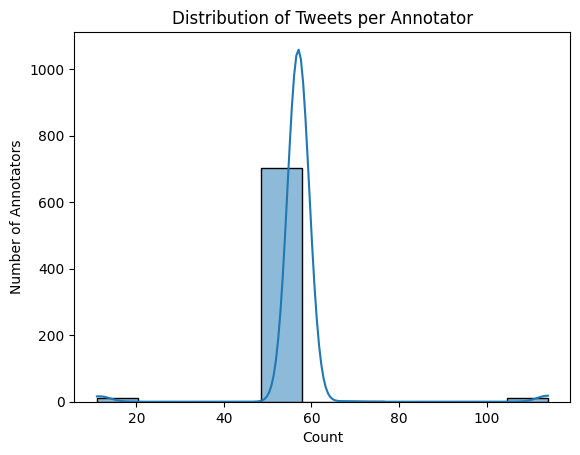

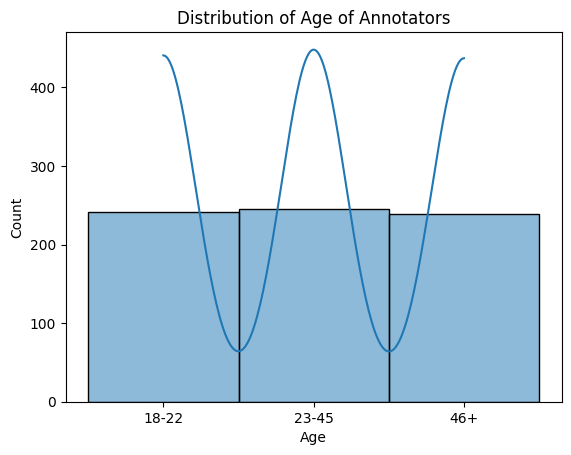

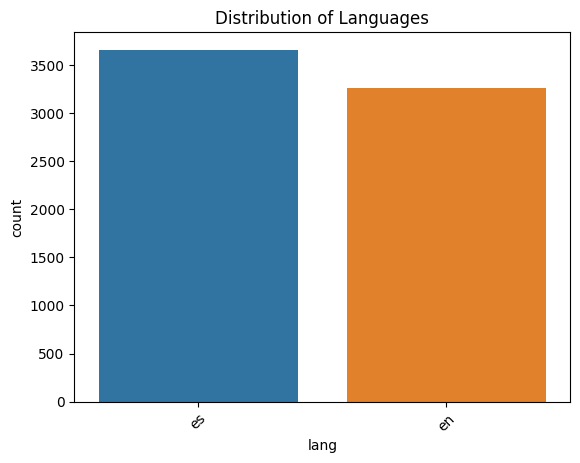

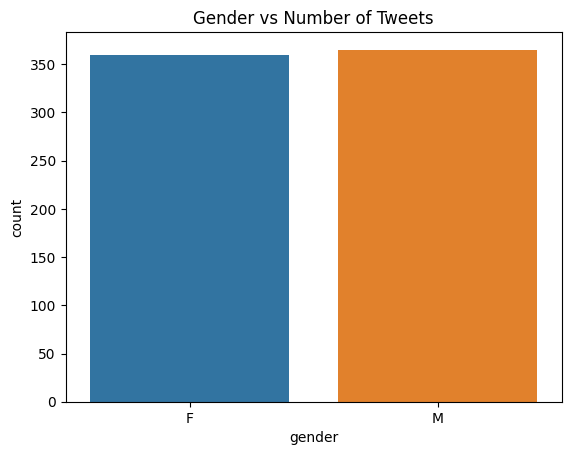

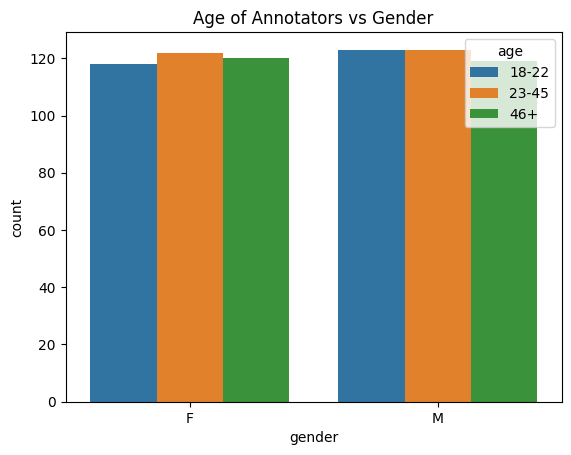

In [ ]:
#Exploratory data analysis via function defined above
#read files into dataframes to do EDA
training_data_df = read_json(training_data_url)
print(training_data_df.head())
# pd.DataFrame(training_data_df.describe).to_csv("training_data_description.csv",index=False)
EDA(training_data_df)

### eda labels

In [ ]:
eval_data_df = read_json(task1_baseline2_url)
eval_data_df.soft_label()

returns a DATAFRAME


,hard_label,soft_label
0,YES,"{'YES': 1.0, 'NO': 0.0}"
1,YES,"{'YES': 1.0, 'NO': 0.0}"
2,YES,"{'YES': 1.0, 'NO': 0.0}"
3,YES,"{'YES': 1.0, 'NO': 0.0}"
4,YES,"{'YES': 1.0, 'NO': 0.0}"


In [ ]:
gold_soft_task1_df = read_json(task1_gold_soft_url)
gold_soft_task1_df.head()

returns a DATAFRAME


,soft_label
0,"{'YES': 0.8333333333333334, 'NO': 0.1666666666..."
1,"{'NO': 0.8333333333333334, 'YES': 0.1666666666..."
2,"{'NO': 1.0, 'YES': 0.0}"
3,"{'NO': 0.5, 'YES': 0.5}"
4,"{'YES': 0.6666666666666666, 'NO': 0.3333333333..."


In [ ]:
gold_hard_task1_df = read_json(task1_gold_hard_url)
gold_hard_task1_df.shape

returns a DATAFRAME


(6064, 1)

### development data

returns a DATAFRAME
  id_EXIST lang                                              tweet  \
0   300001   es  @Fichinescu La comunidad gamer es un antro de ...   
1   300002   es  @anacaotica88 @MordorLivin No me acuerdo de lo...   
2   300003   es  @cosmicJunkBot lo digo cada pocos dias y lo re...   
3   300004   es  Also mientras les decia eso la señalaba y deci...   
4   300005   es  And all people killed,  attacked, harassed by ...   

   number_annotators                                         annotators  \
0                  6  [Annotator_726, Annotator_727, Annotator_357, ...   
1                  6  [Annotator_731, Annotator_732, Annotator_315, ...   
2                  6  [Annotator_735, Annotator_736, Annotator_345, ...   
3                  6  [Annotator_259, Annotator_739, Annotator_291, ...   
4                  6  [Annotator_731, Annotator_732, Annotator_315, ...   

    gender_annotators                          age_annotators  \
0  [F, F, F, M, M, M]  [18-22, 23-45, 46+, 

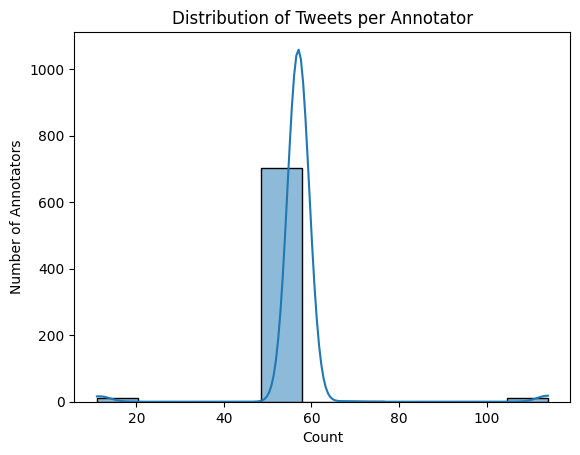

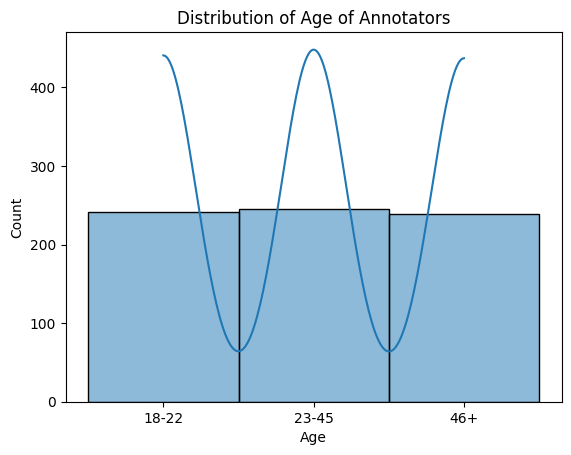

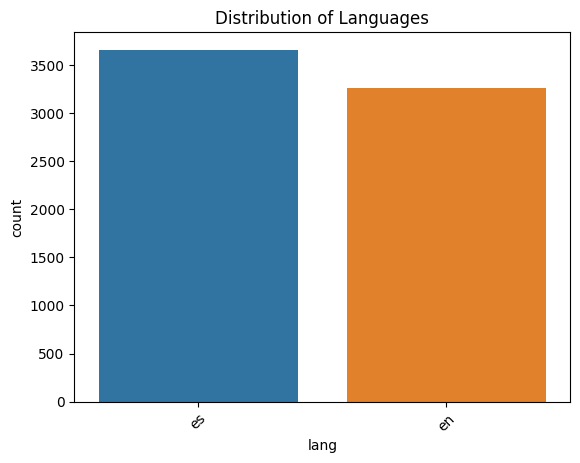

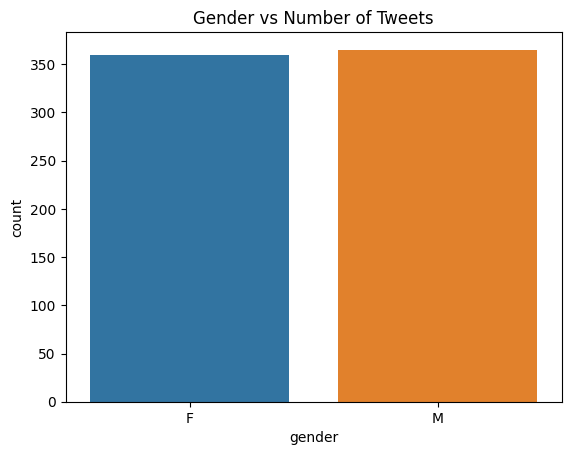

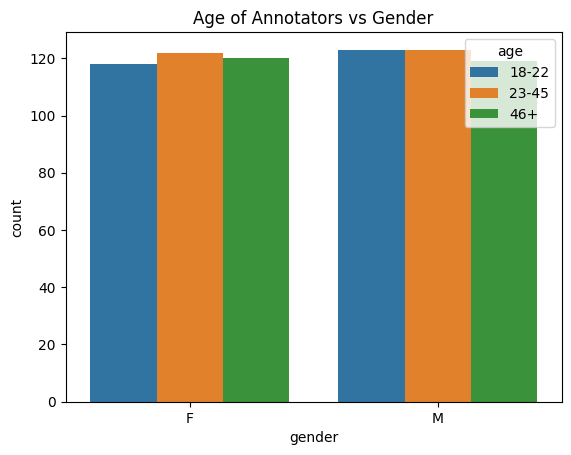

In [ ]:
dev_data_df = read_json(dev_data_url)
print(dev_data_df.head())
EDA(training_data_df)

# Modify given data

In [8]:
training_data.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES


In [9]:
print("sample data all")
index = 0
print("====================================================")
print("Training data label samples")
print("task1")
print(training_data["labels_task1"][index])
print("task2")
print(training_data["labels_task2"][index])
print("task3")
print(training_data["labels_task3"][index])

print("====================================================")
print("Training data soft samples")
print("task1")
gold_soft_task1_df= read_json(task1_train_gold_soft_url)
print(gold_soft_task1_df.iloc[index,0])

print("task2")
gold_soft_task2_df= read_json(task2_train_gold_soft_url)
print(gold_soft_task2_df.iloc[index,0])

print("task3")
gold_soft_task3_df= read_json(task3_train_gold_soft_url)
print(gold_soft_task3_df.iloc[index,0])

print("====================================================")
print("Training data hard samples")
print("task1")
gold_hard_task1_df= read_json(task1_train_gold_hard_url)
print(gold_hard_task1_df.iloc[index,:])
print(gold_hard_task1_df.shape)

print("task2")
gold_hard_task2_df= read_json(task2_train_gold_hard_url)
print(gold_hard_task2_df.iloc[index,:])
print(gold_hard_task2_df.shape)

print("task3")
gold_hard_task3_df= read_json(task3_train_gold_hard_url)
print(gold_hard_task3_df.iloc[index,:])
print(gold_hard_task3_df.shape)

sample data all
Training data label samples
task1
['YES', 'YES', 'NO', 'YES', 'YES', 'YES']
task2
['REPORTED', 'JUDGEMENTAL', '-', 'REPORTED', 'JUDGEMENTAL', 'REPORTED']
task3
[['OBJECTIFICATION'], ['OBJECTIFICATION', 'SEXUAL-VIOLENCE'], ['-'], ['STEREOTYPING-DOMINANCE'], ['SEXUAL-VIOLENCE'], ['IDEOLOGICAL-INEQUALITY', 'MISOGYNY-NON-SEXUAL-VIOLENCE']]
Training data soft samples
task1
{'YES': 0.8333333333333334, 'NO': 0.16666666666666666}
task2
{'REPORTED': 0.5, 'JUDGEMENTAL': 0.3333333333333333, 'NO': 0.16666666666666666, 'DIRECT': 0.0}
task3
{'OBJECTIFICATION': 0.3333333333333333, 'SEXUAL-VIOLENCE': 0.3333333333333333, 'NO': 0.16666666666666666, 'STEREOTYPING-DOMINANCE': 0.16666666666666666, 'IDEOLOGICAL-INEQUALITY': 0.16666666666666666, 'MISOGYNY-NON-SEXUAL-VIOLENCE': 0.16666666666666666}
Training data hard samples
task1
hard_label    YES
Name: 0, dtype: object
(6064, 1)
task2
hard_label    REPORTED
Name: 0, dtype: object
(5496, 1)
task3
hard_label    [OBJECTIFICATION, SEXUAL-VIOLENC

In [10]:
# create dictionaries to convert given data into numerical blocks
#unique_labels1 = ['YES', 'NO']
#unique_labels2 = ['REPORTED', 'JUDGEMENTAL', '-', 'DIRECT', 'UNKNOWN']
#unique_lables3 = ['OBJECTIFICATION', 'SEXUAL-VIOLENCE', '-', 'STEREOTYPING-DOMINANCE', 'IDEOLOGICAL-INEQUALITY', 'MISOGYNY-NON-SEXUAL-VIOLENCE', 'UNKNOWN']

#########################################
########### General Functions ###########
#########################################

def lang_numerator(lang):
    lang_dict = { "es": 0, "en" : 1}
    return lang_dict[lang]

def age_numerator(age):
    age_dict = {"18-22":0, "23-45": 1, "46+":2}
    return age_dict[age]

def age_numerator_large(age_list):
    age_dict = {"18-22":"0", "23-45": "1", "46+":"2"}
    age_string = ""
    for age in age_list:
        age_string+=age_dict[age]
    return int("1"+age_string+"1")

def gender_numerator(gender):
    gender_dict = { "M" : 1, "F": 0}
    return gender_dict[gender]

def gender_numerator_large(gender_list):
    gender_dict = { "M" : '1', "F": '0' }
    gender_string = ""
    for gender in gender_list:
        gender_string+=gender_dict[gender]
    return int("1"+gender_string+"1")

def annotator_numerator(annotator_list): 
    """
    returns list with annotator numbers
    """
    import re
    local_list = []
    pattern = r'\d+\.?\d*'
    for annotator in annotator_list:
        num = int(re.findall(pattern, annotator)[0])
        local_list.append(num)
    #adds a "1" in the beginning to ensure that the annotators are defined correctly
    return local_list

# function to create annotator numericals based on the input
def annotator_numerator_large(annotator_list):
    """
    returns a string with 1s at the beginning and end. 
    Each annotator id can be 4 character seprater for the remaining characters.
    example: "10001000200030004000500061"
    0001, 0002, 0003, 0004, 0005, 0006 are the annotators
    """
    # print(annotator_list)
    import re
    annotator_string = ""
    pattern = r'\d+\.?\d*'
    for annotator in annotator_list:
        num = int(re.findall(pattern, annotator)[0])
        # Convert the number to a four-digit string
        num_str = '{:04d}'.format(num)
        annotator_string += num_str
    #adds a "1" in the beginning to ensure that the annotators are defined correctly
    return int("1"+annotator_string+"1")

#########################################
###########  Task1 Functions  ###########
#########################################

def task1_label_numerator(task1_label):
    label_task1_dict = { "YES":1, "NO": 0 }
    return label_task1_dict[task1_label]

def task1_label_numerator_large(task1_list):
    label_task1_dict = { "YES":"1", "NO": "0" }
    task1_string = ""
    for task1_label in task1_list:
        task1_string+=label_task1_dict[task1_label]
    return int("1"+task1_string+"1")

# def task1_soft_label_generator(url):
#     """
#     gets whole list of labels for one row in data and returns 
#     the softlabels as a tuples with probabilities of "yes" first and "no" second
#     """
#     labels_list=[]
#     gold_soft_task1_df = read_json(url)
#     for i in range(0,len(gold_soft_task1_df)):
#         labels = gold_soft_task1_df.iloc[i,0]
#         labels_list.append([labels["YES"],labels["NO"]])
#     return pd.Series(labels_list)


def task1_soft_label_generator(task1_list):
    """
    gets whole list of labels for one row in data and returns 
    the softlabels as a tuples with probabilities of "yes" first and "no" second
    """
    yes_count = len([label for label in task1_list if label == "YES"])
    no_count = len([label for label in task1_list if label == "NO"])
    return [yes_count/(len(task1_list)), no_count/(len(task1_list))]

def task1_hard_label_generator(soft_labels):
    import random
    import numpy as np
    import pandas as pd
    hard_labels =[]
    for labels in soft_labels:
        if labels[0] > 0.5:
            hard_labels.append("YES")
        elif labels[0] == 0.5:
            hard_labels.append("UND")
        else:
            hard_labels.append("NO")
    return pd.Series(hard_labels)
#########################################
###########   Task2 Functions ###########
#########################################
def task2_label_numerator(task2_label): 
    """
    returns list with just the numerical label
    """
    label_task2_dict = {"-": 0, "DIRECT":1, "REPORTED":2,"JUDGEMENTAL":3, "UNKNOWN":4}
    return label_task2_dict[task2_label]

def task2_label_numerator_large(task2_list): 
    """
    returns a string with 1s at the beginning and end. 
    Each label id is 1 character seprater for the remaining characters.
    example: "101231"
    0, 1, 2, 3 are the labels
    """
    label_task2_dict = {"-": "0", "DIRECT":"1", "REPORTED":"2","JUDGEMENTAL":"3", "UNKNOWN":"4"}
    task2_string=""
    for task2_label in task2_list:
        task2_string += label_task2_dict[task2_label]
    return int("1"+task2_string+"1")

# def task2_soft_label_generator(url):
#     """
#     gets whole list of labels for one row in data and returns 
#     the softlabels as a tuples with probabilities of "yes" first and "no" second
#     """
#     labels_list=[]
#     gold_soft_task1_df = read_json(url)
#     for i in range(0,len(gold_soft_task1_df)):
#         labels = gold_soft_task1_df.iloc[i,0]
#         labels_list.append([labels["YES"],labels["NO"]])
#     return pd.Series(labels_list)


def task2_soft_label_generator(task2_list):
    """
    gets whole list of labels for one row in data and returns 
    the softlabels as a tuples with probabilities of "yes" first and "no" second
    in the order: 
    direct, judgemental, No,  reported, 
    "DIRECT", "JUDGEMENTAL","-","REPORTED"
    we ignore the label for unknown directly from the block

    """
    direct_count = len([label for label in task2_list if label == "DIRECT"])
    jugdemental_count = len([label for label in task2_list if label == "JUDGEMENTAL"])
    no_count = len([label for label in task2_list if label == "-"])
    reported_count = len([label for label in task2_list if label == "REPORTED"])
    
    total_count = (no_count+direct_count+reported_count+jugdemental_count)
    return [direct_count/total_count,jugdemental_count/total_count,no_count/total_count,reported_count/total_count]


def task2_hard_label_generator(soft_labels):
    import random
    import numpy as np
    import pandas as pd
    labels_pattern = ["DIRECT", "JUDGEMENTAL","-","REPORTED"]
    hard_labels =[]
    for labels in soft_labels:
        if labels.count(max(labels)) > 1:
            hard_labels.append("UND")
        else:
            hard_labels.append(labels_pattern[labels.index(max(labels))])
    return pd.Series(hard_labels)

#########################################
########### Task3   Functions ###########
#########################################
def task3_label_numerator(task3_label): 
    """
     returns numerical labels for each type of task3 label
     """
    label_task3_dict = {'-':0,  'IDEOLOGICAL-INEQUALITY':1,  'MISOGYNY-NON-SEXUAL-VIOLENCE':2,  'OBJECTIFICATION':3,  'SEXUAL-VIOLENCE':4,  'STEREOTYPING-DOMINANCE':5,  'UNKNOWN':6}
    return label_task3_dict[task3_label]


def task3_label_numerator_large(task3_list): 
    """ 
    returns a string of containing all the labels listed in a particular list of task3 labels.
    example: 
    if a list of lists is given like this:
    [['-'],["-", "OBJECTIFICATION", "STEREOTYPING-DOMINANCE", "IDEOLOGICAL-INEQUALITY"]]
    each sublist is given a value based on the universe of available types of classifications
    This may help calssifying the task with labels all together.
    """
    import itertools
    labels = ["-", "OBJECTIFICATION", "STEREOTYPING-DOMINANCE", "IDEOLOGICAL-INEQUALITY", "SEXUAL-VIOLENCE", "MISOGYNY-NON-SEXUAL-VIOLENCE", "UNKNOWN"]
    labels = sorted(labels)
    label_dict = {label: i for i, label in enumerate(labels)}
    num_labels = len(labels)
    num_combinations = 2**num_labels

    label_combinations = []
    for i in range(num_combinations):
        binary_string = format(i, f'0{num_labels}b')
        combination = [labels[label_dict[label]] for j, label in enumerate(labels) if binary_string[j] == '1']
        label_combinations.append(combination)

    #dictionary to be used for the task
    label_task3_dict = {'{:03d}'.format(i):label_combinations[i] for i in range(len(label_combinations))}
    def get_key(given_value,my_dict):
        return next(key for key, value in my_dict.items() if value == given_value)
    task3_string = ""
    for annotators in task3_list:
        annotators = sorted(annotators)
        if annotators in label_combinations:
            task3_string += get_key(annotators,label_task3_dict)
    return int("1"+task3_string+"1")

def task3_soft_label_generator(task3_list):
    """
    gets whole list of labels for one row in data and returns 
    the softlabels as a lists with probabilities in the order: 
    
    ideological, misogy, no, objectification, sexual, stereotyping-dominance
    "IDEOLOGICAL-INEQUALITY","MISOGYNY-NON-SEXUAL-VIOLENCE", "-",  "OBJECTIFICATION", "SEXUAL-VIOLENCE", "STEREOTYPING-DOMINANCE"
    
    we ignore the label for "unknown" directly from the list

    """
    total_count = len(task3_list)
    ideo_count=0
    miso_count=0
    no_count =0
    obj_count =0
    sex_count = 0
    stereo_count = 0
    unknown_count = 0
    for labels in task3_list:
        ideo_count += len([label for label in labels if label ==  "IDEOLOGICAL-INEQUALITY"])
        miso_count += len([label for label in labels if label == "MISOGYNY-NON-SEXUAL-VIOLENCE"])
        no_count += len([label for label in labels if label == "-"])
        obj_count += len([label for label in labels if label == "OBJECTIFICATION"])
        sex_count += len([label for label in labels if label == "SEXUAL-VIOLENCE"])
        stereo_count += len([label for label in labels if label == "STEREOTYPING-DOMINANCE"])
        unknown_count += len([label for label in labels if label == "UNKNOWN"])
    total_count = total_count-unknown_count
    return [ideo_count/total_count,miso_count/total_count,no_count/total_count,obj_count/total_count,sex_count/total_count,stereo_count/total_count]


def task3_hard_label_generator(soft_labels):
    import random
    import numpy as np
    import pandas as pd
    labels_pattern = [ "IDEOLOGICAL-INEQUALITY","MISOGYNY-NON-SEXUAL-VIOLENCE", "-",  "OBJECTIFICATION", "SEXUAL-VIOLENCE", "STEREOTYPING-DOMINANCE"]
    hard_labels =[]
    for labels in soft_labels:
        max_val_indices = [index for index, value in enumerate(labels) if value == max(labels)]
        # print(labels)
        if labels.count(max(labels)) > 1:
            if 2 in  max_val_indices:
                #appends if UND pops into the same category label as others
                hard_labels.append(["UND"])
            else:
                #appends the labels with highest
                hard_labels.append([labels_pattern[index] for index in max_val_indices])
        else:
            hard_labels.append([labels_pattern[index] for index in max_val_indices])
    return pd.Series(hard_labels)

In [13]:
def first_transform_data(local_df):
    #creates numerical values for languages
    local_df["lang_label"] = local_df["lang"].apply(lang_numerator)

    #creates numerical list of annotators
    local_df["annotator_number_list"] = local_df["annotators"].apply(annotator_numerator)

    #creates numerical list of genders
    genders_list =[]
    for gender_labels in local_df["gender_annotators"]:
        local_gender_list = []
        for labels in gender_labels:
            local_gender_list.append(gender_numerator(labels))
        genders_list.append(local_gender_list)
    local_df["gender_label_list"] = pd.Series(genders_list)

    #creates numerical list of ages
    age_list =[]
    for ages in local_df["age_annotators"]:
        local_age_list = []
        for age in ages:
            local_age_list.append(age_numerator(age))
        age_list.append(local_age_list)
    local_df["age_annotators_list"] = pd.Series(age_list)

    """"""""""""""""""""""""""""""""""""""""""""
    #creates numerical list of labels for task1"
    """"""""""""""""""""""""""""""""""""""""""""
    task1_labels_list=[]
    for labels in local_df["labels_task1"]:
        local_task1_list = []
        for label in labels:
            local_task1_list.append(task1_label_numerator(label))
        task1_labels_list.append(local_task1_list)
    local_df["task1_labels_list"] = pd.Series(task1_labels_list)

    #creates string of labels
    local_df["task1_labels_string"]=training_data["labels_task1"].apply(task1_label_numerator_large)

    #creates softlabels for task1
    local_df["task1_soft_labels"] = local_df["labels_task1"].apply(task1_soft_label_generator)

    #creates hardlabels for task1
    local_df["task1_hard_labels"] = task1_hard_label_generator(local_df["task1_soft_labels"])

    """"""""""""""""""""""""""""""""""""""""""""
    #creates numerical list of labels for task2"
    """"""""""""""""""""""""""""""""""""""""""""
    task2_labels_list=[]
    for labels in local_df["labels_task2"]:
        local_task2_list = []
        for label in labels:
            local_task2_list.append(task2_label_numerator(label))
        task2_labels_list.append(local_task2_list)
    local_df["task2_labels_list"] = pd.Series(task2_labels_list)

    #creates integer list for task2 labels
    local_df["task2_labels_string"]=local_df["labels_task2"].apply(task2_label_numerator_large)


    #creates task2 softlabels
    local_df["task2_soft_labels"]=local_df["labels_task2"].apply(task2_soft_label_generator)

    #create task2 hardlabels
    local_df["task2_hard_labels"]=task2_hard_label_generator(local_df["task2_soft_labels"])


    """"""""""""""""""""""""""""""""""""""""""""
    #creates numerical list of labels for task3"
    """"""""""""""""""""""""""""""""""""""""""""
    task3_labels_list=[]
    for labels_list in local_df["labels_task3"]:
        local_task3_list=[]
        for labels in labels_list:
          local_task3_list_small = []
          for label in labels:
              local_task3_list_small.append(task3_label_numerator(label))
          local_task3_list.append(local_task3_list_small)
        task3_labels_list.append(local_task3_list)
    local_df["task3_labels_list"] = pd.Series(task3_labels_list)

    #creates integer list for task3 labels
    local_df["task3_labels_string"]=local_df["labels_task3"].apply(task3_label_numerator_large)


    #creates task3 softlabels
    local_df["task3_soft_labels"]=local_df["labels_task3"].apply(task3_soft_label_generator)

    #create task3 hardlabels
    local_df["task3_hard_labels"]=task3_hard_label_generator(local_df["task3_soft_labels"]) 
    
    return local_df

training_data = read_json(training_data_url)
print(training_data.shape)
transformed_data = first_transform_data(training_data)
print(transformed_data.shape)

os.chdir("/content/drive/MyDrive/ml4nlp2/our_code/transformed_data_2023")
transformed_data.to_csv("train_data_transformed_07.04.23.csv",index=False)

(6920, 11)
(6920, 27)


In [ ]:
print("sample data all")
index = 136
print("====================================================")
print("Training data label samples")
print("task1")
print(training_data["labels_task1"][index])
print("task2")
print(training_data["labels_task2"][index])
print("task3")
print(training_data["labels_task3"][index])

print("====================================================")
print("Training data soft samples")
print("task1")
gold_soft_task1_df= read_json(task1_train_gold_soft_url)
print(gold_soft_task1_df.iloc[index,0])

print("task2")
gold_soft_task2_df= read_json(task2_train_gold_soft_url)
print(gold_soft_task2_df.iloc[index,0])

print("task3")
gold_soft_task3_df= read_json(task3_train_gold_soft_url)
print(gold_soft_task3_df.iloc[index,0])

print("====================================================")
print("Training data hard samples")
print("task1")
gold_hard_task1_df= read_json(task1_train_gold_hard_url)
print(gold_hard_task1_df.iloc[index,:])

print("task2")
gold_hard_task2_df= read_json(task2_train_gold_hard_url)
print(gold_hard_task2_df.iloc[index,:])

print("task3")
gold_hard_task3_df= read_json(task3_train_gold_hard_url)
print(gold_hard_task3_df.iloc[index,:])


sample data all
Training data label samples
task1
['YES', 'YES', 'NO', 'YES', 'YES', 'YES']
task2
['REPORTED', 'JUDGEMENTAL', '-', 'REPORTED', 'JUDGEMENTAL', 'REPORTED']
task3
[['OBJECTIFICATION'], ['OBJECTIFICATION', 'SEXUAL-VIOLENCE'], ['-'], ['STEREOTYPING-DOMINANCE'], ['SEXUAL-VIOLENCE'], ['IDEOLOGICAL-INEQUALITY', 'MISOGYNY-NON-SEXUAL-VIOLENCE']]
Training data soft samples
task1
{'YES': 0.8333333333333334, 'NO': 0.16666666666666666}
task2
{'REPORTED': 0.5, 'JUDGEMENTAL': 0.3333333333333333, 'NO': 0.16666666666666666, 'DIRECT': 0.0}
task3
{'OBJECTIFICATION': 0.3333333333333333, 'SEXUAL-VIOLENCE': 0.3333333333333333, 'NO': 0.16666666666666666, 'STEREOTYPING-DOMINANCE': 0.16666666666666666, 'IDEOLOGICAL-INEQUALITY': 0.16666666666666666, 'MISOGYNY-NON-SEXUAL-VIOLENCE': 0.16666666666666666}
Training data hard samples
task1
hard_label    YES
Name: 0, dtype: object
task2
hard_label    REPORTED
Name: 0, dtype: object
task3
hard_label    [OBJECTIFICATION, SEXUAL-VIOLENCE]
Name: 0, dtype: o

In [ ]:
transformed_data.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,...,task1_soft_labels,task1_hard_labels,task2_labels_list,task2_labels_string,task2_soft_labels,task2_hard_labels,task3_labels_list,task3_labels_string,task3_soft_labels,task3_hard_labels
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",...,"[0.8333333333333334, 0.16666666666666666]",YES,"[2, 3, 0, 2, 3, 2]",12302321,"[0.0, 0.3333333333333333, 0.16666666666666666,...",REPORTED,"[[3], [3, 4], [0], [5], [4], [1, 2]]",10080120640020040481,"[0.16666666666666666, 0.16666666666666666, 0.1...","[OBJECTIFICATION, SEXUAL-VIOLENCE]"
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",...,"[0.16666666666666666, 0.8333333333333334]",NO,"[0, 0, 0, 0, 1, 0]",10000101,"[0.16666666666666666, 0.0, 0.8333333333333334,...",-,"[[0], [0], [0], [0], [3], [0]]",10640640640640080641,"[0.0, 0.0, 0.8333333333333334, 0.1666666666666...",[-]
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",...,"[0.0, 1.0]",NO,"[0, 0, 0, 0, 0, 0]",10000001,"[0.0, 0.0, 1.0, 0.0]",-,"[[0], [0], [0], [0], [0], [0]]",10640640640640640641,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",[-]
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",...,"[0.5, 0.5]",UND,"[0, 0, 1, 0, 2, 2]",10010221,"[0.16666666666666666, 0.0, 0.5, 0.333333333333...",-,"[[0], [0], [1], [0], [1], [1, 3, 4]]",10640640320640320441,"[0.5, 0.0, 0.5, 0.16666666666666666, 0.1666666...",[UND]
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",...,"[0.6666666666666666, 0.3333333333333333]",YES,"[2, 0, 3, 0, 3, 1]",12030311,"[0.16666666666666666, 0.3333333333333333, 0.33...",UND,"[[5, 3], [0], [1, 3], [0], [1, 5], [5, 3]]",10100640400640340101,"[0.3333333333333333, 0.0, 0.3333333333333333, ...","[OBJECTIFICATION, STEREOTYPING-DOMINANCE]"


In [ ]:
def find_sublist(name,items_list):
    local_list =[]
    for i,items in enumerate(items_list):
        if name in items:
            local_list.append([i,items])

    return local_list

find_sublist("UNKNOWN",training_data["labels_task2"])

In [ ]:
print("sample data all")
index = 6
print("====================================================")
print("Training data label samples")
print("task1")
print(training_data["labels_task1"][index])
print("task2")
print(training_data["labels_task2"][index])
print("task3")
print(training_data["labels_task3"][index])

print("====================================================")
print("Training data soft samples")
print("task1")
gold_soft_task1_df= read_json(task1_train_gold_soft_url)
print(gold_soft_task1_df.iloc[index,0])

print("task2")
gold_soft_task2_df= read_json(task2_train_gold_soft_url)
print(gold_soft_task2_df.iloc[index,0])

print("task3")
gold_soft_task3_df= read_json(task3_train_gold_soft_url)
print(gold_soft_task3_df.iloc[index,0])

print("====================================================")
print("Training data hard samples")
print("task1")
gold_hard_task1_df= read_json(task1_train_gold_hard_url)
print(gold_hard_task1_df.iloc[index,:])

print("task2")
gold_hard_task2_df= read_json(task2_train_gold_hard_url)
print(gold_hard_task2_df.iloc[index,:])

print("task3")
gold_hard_task3_df= read_json(task3_train_gold_hard_url)
print(gold_hard_task3_df.iloc[index,:])


sample data all
Training data label samples
task1
['NO', 'YES', 'YES', 'NO', 'NO', 'YES']
task2
['-', 'UNKNOWN', 'DIRECT', '-', '-', 'DIRECT']
task3
[['-'], ['UNKNOWN'], ['MISOGYNY-NON-SEXUAL-VIOLENCE'], ['-'], ['-'], ['MISOGYNY-NON-SEXUAL-VIOLENCE']]
Training data soft samples
task1
{'NO': 0.5, 'YES': 0.5}
task2
{'NO': 0.6, 'DIRECT': 0.4, 'REPORTED': 0.0, 'JUDGEMENTAL': 0.0}
task3
{'NO': 0.6, 'MISOGYNY-NON-SEXUAL-VIOLENCE': 0.4, 'IDEOLOGICAL-INEQUALITY': 0.0, 'STEREOTYPING-DOMINANCE': 0.0, 'SEXUAL-VIOLENCE': 0.0, 'OBJECTIFICATION': 0.0}
Training data hard samples
task1
hard_label    NO
Name: 6, dtype: object
task2
hard_label    NO
Name: 6, dtype: object
task3
hard_label    [NO]
Name: 6, dtype: object


In [ ]:
unique_annotators = []
for annotators in training_data_df["labels_task3"]:
    for annotator in annotators:
        for anno in annotator:
            if anno not in  unique_annotators:
                unique_annotators.append(anno)

print(unique_annotators)

['OBJECTIFICATION', 'SEXUAL-VIOLENCE', '-', 'STEREOTYPING-DOMINANCE', 'IDEOLOGICAL-INEQUALITY', 'MISOGYNY-NON-SEXUAL-VIOLENCE', 'UNKNOWN']


In [ ]:
unique_annotators = []
for annotators in training_data_df["labels_task2"]:
    for annotator in annotators:
        if annotator not in  unique_annotators:
            unique_annotators.append(annotator)

print(unique_annotators)

['REPORTED', 'JUDGEMENTAL', '-', 'DIRECT', 'UNKNOWN']


#create dataset similar to 2021 Task

In [ ]:
gold_soft_task1_df.head()

,soft_label
0,"{'YES': 0.8333333333333334, 'NO': 0.1666666666..."
1,"{'NO': 0.8333333333333334, 'YES': 0.1666666666..."
2,"{'NO': 1.0, 'YES': 0.0}"
3,"{'NO': 0.5, 'YES': 0.5}"
4,"{'YES': 0.6666666666666666, 'NO': 0.3333333333..."


In [ ]:
gold_soft_task1_df.iloc[1,0]

{'NO': 0.8333333333333334, 'YES': 0.16666666666666666}

In [ ]:
import random
gold_soft_task1_df = read_json(task1_dev_gold_soft_url)
gold_soft_task1_df.shape
count=0
hard_labels=[]
for i in range(0,len(gold_soft_task1_df)):
    labels = gold_soft_task1_df.iloc[i,0]
    # print(labels)
    if labels["YES"] > 0.5:
        hard_labels.append("YES")
    elif labels["YES"] == 0.5:
        hard_labels.append(random.choice(["YES", "NO"]))
        count+=1
    else:
        hard_labels.append("NO")

gold_soft_task1_df["hard_label"]= pd.Series(hard_labels)
print(gold_soft_task1_df.shape)
gold_soft_task1_df.head()

returns a DATAFRAME
(1038, 2)


,soft_label,hard_label
0,"{'NO': 0.5, 'YES': 0.5}",NO
1,"{'YES': 0.8333333333333334, 'NO': 0.1666666666...",YES
2,"{'NO': 1.0, 'YES': 0.0}",NO
3,"{'NO': 0.16666666666666666, 'YES': 0.833333333...",YES
4,"{'NO': 0.8333333333333334, 'YES': 0.1666666666...",NO


In [ ]:
import random
gold_soft_task1_df = read_json(task1_train_gold_soft_url)
gold_soft_task1_df.shape
count=0
hard_labels=[]
for i in range(0,len(gold_soft_task1_df)):
    labels = gold_soft_task1_df.iloc[i,0]
    # print(labels)
    if labels["YES"] > 0.5:
        hard_labels.append("YES")
    elif labels["YES"] == 0.5:
        hard_labels.append(random.choice(["YES", "NO"]))
        count+=1
    else:
        hard_labels.append("NO")

gold_soft_task1_df["hard_label"]= pd.Series(hard_labels)
gold_soft_task1_df.head()

returns a DATAFRAME


,soft_label,hard_label
0,"{'YES': 0.8333333333333334, 'NO': 0.1666666666...",YES
1,"{'NO': 0.8333333333333334, 'YES': 0.1666666666...",NO
2,"{'NO': 1.0, 'YES': 0.0}",NO
3,"{'NO': 0.5, 'YES': 0.5}",NO
4,"{'YES': 0.6666666666666666, 'NO': 0.3333333333...",YES


In [ ]:
train_for_2021= train_data_df[["id_EXIST",	"lang",	"tweet","split"]]
train_for_2021 = pd.concat([train_for_2021,gold_soft_task1_df],axis=1)
train_for_2021.head()

,id_EXIST,lang,tweet,split,soft_label,hard_label
0,300001,es,@Fichinescu La comunidad gamer es un antro de ...,DEV_ES,"{'YES': 0.8333333333333334, 'NO': 0.1666666666...",YES
1,300002,es,@anacaotica88 @MordorLivin No me acuerdo de lo...,DEV_ES,"{'NO': 0.8333333333333334, 'YES': 0.1666666666...",NO
2,300003,es,@cosmicJunkBot lo digo cada pocos dias y lo re...,DEV_ES,"{'NO': 1.0, 'YES': 0.0}",NO
3,300004,es,Also mientras les decia eso la señalaba y deci...,DEV_ES,"{'NO': 0.5, 'YES': 0.5}",NO
4,300005,es,"And all people killed, attacked, harassed by ...",DEV_ES,"{'YES': 0.6666666666666666, 'NO': 0.3333333333...",YES


In [ ]:
os.chdir("/content/drive/MyDrive/ml4nlp2/neil")
train_for_2021.to_csv("dev_data_2023_for_2021.csv",index=None)

In [ ]:
sample_df = pd.read_csv("dev_data_2023_for_2021.csv")
sample_df.head()

,id_EXIST,lang,tweet,split,soft_label,hard_label
0,300001.0,es,@Fichinescu La comunidad gamer es un antro de ...,DEV_ES,"{'YES': 0.8333333333333334, 'NO': 0.1666666666...",YES
1,300002.0,es,@anacaotica88 @MordorLivin No me acuerdo de lo...,DEV_ES,"{'NO': 0.8333333333333334, 'YES': 0.1666666666...",NO
2,300003.0,es,@cosmicJunkBot lo digo cada pocos dias y lo re...,DEV_ES,"{'NO': 1.0, 'YES': 0.0}",NO
3,300004.0,es,Also mientras les decia eso la señalaba y deci...,DEV_ES,"{'NO': 0.5, 'YES': 0.5}",NO
4,300005.0,es,"And all people killed, attacked, harassed by ...",DEV_ES,"{'YES': 0.6666666666666666, 'NO': 0.3333333333...",YES


In [ ]:
train_data_df = read_json(dev_data_url)
train_data_df.shape

returns a DATAFRAME


(1038, 11)